# TUT21 — Tutorial: Introduction to Quantum Computing: From Algorithm to Hardware

*International Conference on Quantum Computing and Engineering 2023*

Sept. 9, 2023

*By: Hiu Yung Wong, hiuyung.wong@sjsu.edu*

# Resources:
### Book: Introduction to Quantum Computing: From a Layperson to a Programmer in 30 Steps
https://link.springer.com/book/10.1007/978-3-030-98339-0 (Free if your school has a subscription, connect to VPN)

### Videos: Introduction to Quantum Computing From a Layperson to a Programmer in 30 Steps
https://www.youtube.com/playlist?list=PLnK6MrIqGXsJfcBdppW3CKJ858zR8P4eP

### Videos: Quantum Computing Hardware and Architecture
https://www.youtube.com/playlist?list=PLnK6MrIqGXsL1KShnocSdwNSiKnBodpie

**Programming Deutsch Algorithm using IBM-Q**

**Restart Kernel and run again if drawing doesn't work**

In [1]:
!pip install qiskit
!pip install pylatexenc


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136818 sha256=c62e3b802e96917d43bc675f8c4b978a01782d87a54c53687da4da13803ad10a
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


**Deutsch's Algorithm**

Warming up

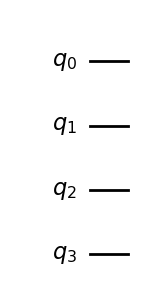

In [2]:
from qiskit import QuantumCircuit, execute, Aer, BasicAer
from qiskit.visualization import plot_histogram

import numpy as np

n=3
f01half = QuantumCircuit(n+1) #constant oracle for f(x)=0 for all x


display(f01half.draw('mpl'))


Warm up 2

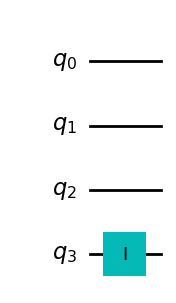

In [4]:
f01half = QuantumCircuit(n+1) #constant oracle for f(x)=0 for all x
f01half.i(n)

display(f01half.draw('mpl'))


**Implement the simplest Deustch Algorithm Circuit**

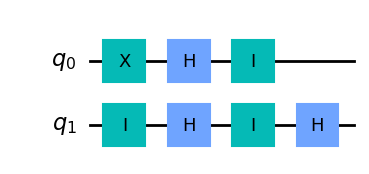

In [6]:
MyQC = QuantumCircuit(2)
MyQC.x(0)
MyQC.i(1)
MyQC.h(0)
MyQC.h(1)
MyQC.i(0)
MyQC.i(1)
MyQC.h(1)
MyQC.draw('mpl')


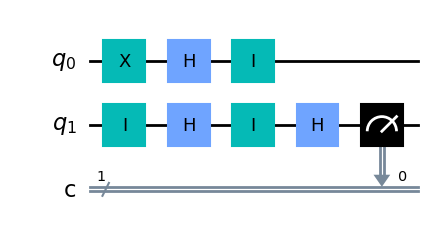

In [14]:
MyQC = QuantumCircuit(2,1)
MyQC.x(0)
MyQC.i(1)
MyQC.h(0)
MyQC.h(1)
MyQC.i(0)
MyQC.i(1)
MyQC.h(1)
MyQC.measure(1,0)
MyQC.draw('mpl')


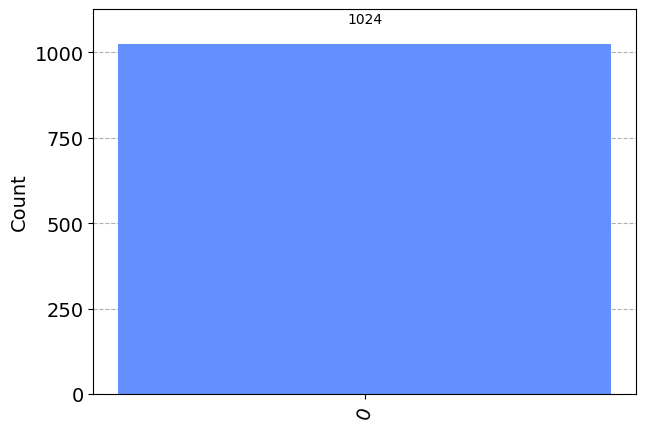

In [15]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(MyQC, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)